# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import json
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [3]:
#pprint list of cities 
print(cities)

['andra', 'leningradskiy', 'leh', 'santa lucia', 'mataura', 'cape town', 'dikson', 'ladispoli', 'derzhavinsk', 'kapaa', 'lima', 'bengkulu', 'kiruna', 'jamestown', 'acarau', 'bentiu', 'maldonado', 'tigil', 'pangnirtung', 'arman', 'qaanaaq', 'bredasdorp', 'tilichiki', 'hermanus', 'atuona', 'khatanga', 'albany', 'bilma', 'pevek', 'mercedes', 'punta arenas', 'grand river south east', 'cherskiy', 'sisimiut', 'ribeira grande', 'eyl', 'gat', 'argalasti', 'hilo', 'lasa', 'rikitea', 'sao joao da barra', 'nikolskoye', 'lishui', 'torbay', 'yellowknife', 'taolanaro', 'jumla', 'chokurdakh', 'bluff', 'ancud', 'aloguinsan', 'shimoda', 'constitucion', 'takoradi', 'arlit', 'oktyabrskoye', 'port hedland', 'barentsburg', 'airai', 'saskylakh', 'serro', 'tuktoyaktuk', 'spearfish', 'zhangye', 'busselton', 'mys shmidta', 'akdepe', 'bubaque', 'nouadhibou', 'ushuaia', 'umm ruwabah', 'westport', 'saint-philippe', 'vanimo', 'tuatapere', 'hobart', 'ust-kan', 'hithadhoo', 'korla', 'avarua', 'caico', 'meulaboh', 'o

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

Beginning Data Retrieval 
-----------------------------


In [30]:
# inital print statements for data retrieval process
print("Beginning Data Retrieval ")
print("-----------------------------")
# set up lists to hold reponse info
cityname = []
cloud = []
country = []
date = []
humidity = []
lat = []
long = []
tempmax = []
wind = []
index_counter = 0
set_counter = 1
# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response["name"])
        cloud.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        tempmax.append(response['main']['temp_max'])
        wind.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
 


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : andra
Processing Record 2 of Set 1 : leningradskiy
Processing Record 3 of Set 1 : leh
Processing Record 4 of Set 1 : santa lucia
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : cape town
Processing Record 7 of Set 1 : dikson
Processing Record 8 of Set 1 : ladispoli
Processing Record 9 of Set 1 : derzhavinsk
Processing Record 10 of Set 1 : kapaa
Processing Record 11 of Set 1 : lima
Processing Record 12 of Set 1 : bengkulu
Processing Record 13 of Set 1 : kiruna
Processing Record 14 of Set 1 : jamestown
Processing Record 15 of Set 1 : acarau
Processing Record 16 of Set 1 : bentiu
Processing Record 17 of Set 1 : maldonado
Processing Record 18 of Set 1 : tigil
Processing Record 19 of Set 1 : pangnirtung
Processing Record 20 of Set 1 : arman
Processing Record 21 of Set 1 : qaanaaq
Processing Record 22 of Set 1 : bredasdorp
Processing Record 23 of Set 1 : tilichiki
Processing Record 24

Processing Record 32 of Set 4 : parana
Processing Record 33 of Set 4 : nortelandia
Processing Record 34 of Set 4 : isangel
Processing Record 35 of Set 4 : gore
Processing Record 36 of Set 4 : penarroya-pueblonuevo
Processing Record 37 of Set 4 : longyearbyen
City not found. Skipping...
Processing Record 38 of Set 4 : ribeira brava
City not found. Skipping...
Processing Record 39 of Set 4 : juneau
Processing Record 40 of Set 4 : bontang
Processing Record 41 of Set 4 : iqaluit
Processing Record 42 of Set 4 : uglegorsk
Processing Record 43 of Set 4 : oistins
Processing Record 44 of Set 4 : touros
Processing Record 45 of Set 4 : tiarei
Processing Record 46 of Set 4 : dayong
Processing Record 47 of Set 4 : san carlos de bariloche
Processing Record 48 of Set 4 : surt
Processing Record 49 of Set 4 : sitka
Processing Record 50 of Set 4 : margate
Processing Record 0 of Set 5 : vaitape
Processing Record 1 of Set 5 : dinghai
Processing Record 2 of Set 5 : benguela
Processing Record 3 of Set 5 : m

City not found. Skipping...
Processing Record 15 of Set 8 : senno
Processing Record 16 of Set 8 : te anau
Processing Record 17 of Set 8 : onverwacht
Processing Record 18 of Set 8 : tiznit
Processing Record 19 of Set 8 : tiksi
Processing Record 20 of Set 8 : klaksvik
Processing Record 21 of Set 8 : najran
Processing Record 22 of Set 8 : jackson
Processing Record 23 of Set 8 : bethel
Processing Record 24 of Set 8 : nakapiripirit
Processing Record 25 of Set 8 : osoyoos
Processing Record 26 of Set 8 : petrolia
City not found. Skipping...
City not found. Skipping...
Processing Record 27 of Set 8 : lumberton
Processing Record 28 of Set 8 : kurilsk
Processing Record 29 of Set 8 : okhotsk
Processing Record 30 of Set 8 : hobyo
Processing Record 31 of Set 8 : chachapoyas
Processing Record 32 of Set 8 : jaguarao
Processing Record 33 of Set 8 : nara
Processing Record 34 of Set 8 : mudhol
Processing Record 35 of Set 8 : biskupiec
Processing Record 36 of Set 8 : linhares
Processing Record 37 of Set 

Processing Record 1 of Set 12 : nizwa
Processing Record 2 of Set 12 : miri
Processing Record 3 of Set 12 : cabra
Processing Record 4 of Set 12 : guadalupe y calvo
Processing Record 5 of Set 12 : acapulco
Processing Record 6 of Set 12 : rodrigues alves
Processing Record 7 of Set 12 : dunedin
Processing Record 8 of Set 12 : qiongshan
Processing Record 9 of Set 12 : nipawin
City not found. Skipping...
Processing Record 10 of Set 12 : jega
Processing Record 11 of Set 12 : romitan
Processing Record 12 of Set 12 : ahuimanu
Processing Record 13 of Set 12 : gagarin
Processing Record 14 of Set 12 : corrales
Processing Record 15 of Set 12 : hanchuan
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# Create a panda data frame using data retrieved
citydata_df = pd.DataFrame({ 
                "City" : cityname,
                "Cloudiness(%)" : cloud,
                "Country" : country,
                "Date" : date,
                "Humidity(%)" : humidity,
                "Latitude" : lat,
                "Longitude" : long,
                "Max Temperature(F)" : tempmax,
                "Wind Speed(mph)" : wind})
citydata_df.count()

City                  576
Cloudiness(%)         576
Country               576
Date                  576
Humidity(%)           576
Latitude              576
Longitude             576
Max Temperature(F)    576
Wind Speed(mph)       576
dtype: int64

In [32]:
# displaying new data frame
citydata_df.head()

,City,Cloudiness(%),Country,Date,Humidity(%),Latitude,Longitude,Max Temperature(F),Wind Speed(mph)
0,Andra,100,RU,1612749865,92,62.5147,65.8878,-4.16,7.56
1,Leningradskiy,4,RU,1612749877,86,69.3833,178.4167,-15.84,8.37
2,Leh,45,IN,1612749877,58,34.1667,77.5833,11.59,1.95
3,Santa Lucía,20,ES,1612749877,72,27.9117,-15.5407,60.80,8.05
4,Mataura,100,NZ,1612749877,44,-46.1927,168.8643,73.56,2.59


In [33]:
citydata_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# Skipping this step, but below confirms skipping per no cities wtih humidity>100

In [35]:
#  Get the indices of cities that have humidity over 100%.
humid_100 = citydata_df.loc[ citydata_df["Humidity(%)"] > 100]
humid_100.count()

City                  0
Cloudiness(%)         0
Country               0
Date                  0
Humidity(%)           0
Latitude              0
Longitude             0
Max Temperature(F)    0
Wind Speed(mph)       0
dtype: int64

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

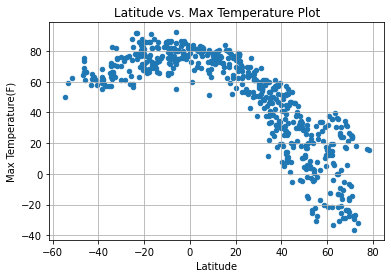

In [38]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Max Temperature(F)"] = citydata_df["Max Temperature(F)"].astype(float)
citydata_df.plot(kind="scatter", x="Latitude", y="Max Temperature(F)",
                 title="Latitude vs. Max Temperature Plot",
                 grid=True, figsize=(6,4))
plt.show()

## Latitude vs. Humidity Plot

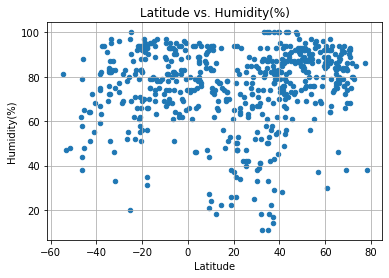

In [39]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Humidity(%)"] = citydata_df["Humidity(%)"].astype(float)
citydata_df.plot(kind="scatter", x="Latitude", y="Humidity(%)",
                 title="Latitude vs. Humidity(%)",
                 grid=True, figsize=(6,4))
plt.show()

## Latitude vs. Cloudiness Plot

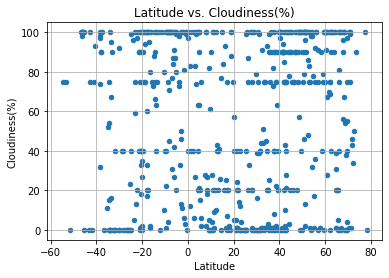

In [40]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Cloudiness(%)"] = citydata_df["Cloudiness(%)"].astype(float)
citydata_df.plot(kind="scatter", x="Latitude", y="Cloudiness(%)",
                 title="Latitude vs. Cloudiness(%)",
                 grid=True, figsize=(6,4))
plt.show()

## Latitude vs. Wind Speed Plot

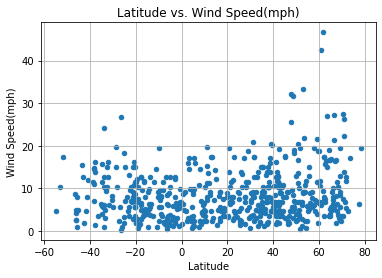

In [42]:
citydata_df["Latitude"] = citydata_df["Latitude"].astype(float)
citydata_df["Wind Speed(mph)"] = citydata_df["Wind Speed(mph)"].astype(float)
citydata_df.plot(kind="scatter", x="Latitude", y="Wind Speed(mph)",
                 title="Latitude vs. Wind Speed(mph)",
                 grid=True, figsize=(6,4))
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression